In [1]:
import pandas as pd

In [2]:
df_s = pd.read_csv('./Sales_data_RMF.csv')

/tmp/ipykernel_25090/922523283.py:1: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_s = pd.read_csv('./Sales_data_RMF.csv')


In [3]:
df_s['구매시월령']

0          35.0
1           9.0
2          22.0
3           8.0
4          23.0
          ...  
199994     13.0
199995    163.0
199996    163.0
199997      5.0
199998     13.0
Name: 구매시월령, Length: 199999, dtype: float64

In [3]:
df_s['구매시월령'].isnull().sum()

0

In [4]:
df_s

,주문번호,배송완료일,배송시작일,구매일,구매시월령,고객번호,구매금액,결제금액,물품대분류,상품명,포인트,배송준비시간,배송시간,물품중분류,물품소분류
0,901011864201303,2021-01-05,2021-01-01,2020-12-31,35.0,201901010750089,74560,43825,팬티,하기스 매직핏팬티 5단계 남아 124매(팬티형),30735,1 days,4 days,기저귀,팬티형
1,901011864430366,2021-01-03,2021-01-01,2020-12-31,9.0,201901010750143,74560,43825,팬티,하기스 매직핏팬티 3단계 남아 184매(팬티형),30735,1 days,2 days,기저귀,팬티형
2,81231186197954,2021-01-05,2021-01-01,2020-12-31,22.0,201812310749820,53920,36769,팬티,하기스 네이처메이드 팬티 5단계 여아 80매(팬티형),17151,1 days,4 days,기저귀,팬티형
3,812311863500220,2021-01-03,2021-01-01,2020-12-31,8.0,201812310750007,52160,32408,팬티,하기스 보송보송팬티 4단계 공용 124매(팬티형),19752,1 days,2 days,기저귀,팬티형
4,812311863220192,2021-01-03,2021-01-01,2020-12-31,23.0,201812310749977,47360,30066,팬티,하기스 에어솔솔 팬티 5단계 남아용 80매(팬티형),17294,1 days,2 days,기저귀,팬티형
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,00806233401-26770461124511,2022-08-11,2022-08-08,2022-08-07,13.0,201906180918504,21300,14910,FC,라네이처 시그니처 울트라슬림 날개 중형 12개입 (EA),6390,1 days,3 days,생리대,생리대
199995,00806204436-0461904922687,2022-08-11,2022-08-08,2022-08-07,163.0,201901280776735,7900,5840,FC,라네이처 시그니처 맥시슬림 날개 중형 12개입 (EA),2060,1 days,3 days,생리대,생리대
199996,00806204436-0461904922688,2022-08-12,2022-08-08,2022-08-07,163.0,201901280776735,7100,5240,FC,라네이처 시그니처 울트라슬림 날개 대형 10개입 (EA),1860,1 days,4 days,생리대,생리대
199997,00806215930-05281256126202,2022-08-10,2022-08-08,2022-08-07,5.0,201906200921415,7100,5240,FC,라네이처 시그니처 울트라슬림 날개 소형 14개입 (EA),1860,1 days,2 days,생리대,생리대


In [29]:
df_s_T = df_s['구매시월령'].notnull().sum()
df_s_F = df_s['구매시월령'].isnull().sum()
print(df_s_T,df_s_F)

168142 31857


- 3만개의 결측치 발견
- '물품대분류'와 '상품명'이 같은 행의 구매시 월령을 다 찾아서 중간값으로 대체함
- 결측치를 채웠지만 156개의 데이터가 채워지지 않았음 - (이유: 같은 상품명에 대한 정보가 없음)
- 채워지지 않은 156개의 '구매시월령'에 대한 데이터는 모든 데이터의 중앙값으로 대체하여 결측치를 채웠음    

In [51]:
print(len(df_s[df_s['구매시월령']>=240.0]))

898


In [47]:
df_s['구매금액'].mode()

0    3000
Name: 구매금액, dtype: int64

- 유아용품판매점 이므로 구매시 월령이 7살을 넘아가는 약 5000개의 데이터를 '물품소분류'가 같은 데이터의 최빈값으로 대체했음
- 따라서 데이터의 이상치 또한 제거

In [5]:
df_1 = df_s.loc[(df_s['구매시월령'] < 0.0)]
df_2 = df_s.loc[(df_s['구매시월령'] >=0.0 ) & (df_s['구매시월령'] <= 0.9)]
df_3 = df_s.loc[(df_s['구매시월령'] >=1.0 ) & (df_s['구매시월령'] <= 3.9)]
df_4 = df_s.loc[(df_s['구매시월령'] >=4.0 ) & (df_s['구매시월령'] <= 11.9)]
df_5 = df_s.loc[(df_s['구매시월령'] >=12 ) & (df_s['구매시월령'] <= 23.9)]
df_6 = df_s.loc[(df_s['구매시월령'] >=24 )]

In [6]:
print(len(df_1)) # 임신  
print(len(df_2)) # 출산
print(len(df_3)) # 신생아
print(len(df_4)) # 돌전아기
print(len(df_5)) # 영유아
print(len(df_6)) # 키즈

15567
16849
35053
72203
31710
28617


In [64]:
import matplotlib
matplotlib.rc('font',family = 'NanumGothic')
matplotlib.rc('axes', unicode_minus = False)

/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, *

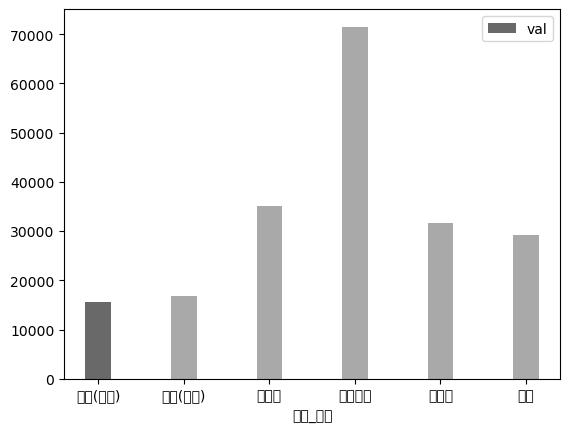

In [7]:
colors = ['dimgrey','darkgray','darkgray','darkgray','darkgray','darkgray','darkgray','darkgray','darkgray']
df = pd.DataFrame({'lab':['임신(산전)', '출산(산후)', '신생아','돌전아기','영유아','키즈'], 'val':[15567,16849,35053,71537,31710,29283]})
ax = df.plot.bar(x='lab',xlabel='이상_이하', y='val', rot=0,color=colors,width=0.3)

- 임신(산전) 15567명
- 출산(산후) 0개월~1개월미만 16849명
- 신생아 1개월~3개월미만  35053명
- 돌전아기 3개월~12개월미만 71537명
- 영유아 12개월~24개월미만 31710명
- 키즈 24개월이상 29283명